In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

In [2]:
train_df = pd.read_csv('avocado_train.csv')
test_df = pd.read_csv('avocado_test.csv')

In [3]:
train_df.head()

,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14761,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,organic,2017,Albany
1,6843,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,conventional,2017,Louisville
2,7306,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,conventional,2017,Orlando
3,12329,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,organic,2016,Charlotte
4,12036,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,organic,2016,Atlanta


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   Date          14599 non-null  object 
 2   AveragePrice  14599 non-null  float64
 3   Total Volume  14599 non-null  float64
 4   4046          14599 non-null  float64
 5   4225          14599 non-null  float64
 6   4770          14599 non-null  float64
 7   Total Bags    14599 non-null  float64
 8   Small Bags    14599 non-null  float64
 9   Large Bags    14599 non-null  float64
 10  XLarge Bags   14599 non-null  float64
 11  type          14599 non-null  object 
 12  year          14599 non-null  int64  
 13  region        14599 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.6+ MB


In [5]:
train_df.describe()

,Id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,14599.000000,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000,14599.000000
mean,9116.120899,1.409168,8.136614e+05,2.787616e+05,2.835157e+05,2.175564e+04,2.296264e+05,1.746354e+05,5.199545e+04,2995.622236,2016.146174
std,5279.989902,0.404518,3.292013e+06,1.206792e+06,1.150215e+06,1.025608e+05,9.429775e+05,7.139212e+05,2.343441e+05,17313.445157,0.937565
min,2.000000,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4538.500000,1.100000,1.080823e+04,8.493600e+02,3.018255e+03,0.000000e+00,5.040900e+03,2.828890e+03,1.314550e+02,0.000000,2015.000000
50%,9125.000000,1.370000,1.070186e+05,8.425390e+03,2.890747e+04,1.807200e+02,3.960296e+04,2.631176e+04,2.621750e+03,0.000000,2016.000000
75%,13698.500000,1.670000,4.261702e+05,1.087822e+05,1.451605e+05,6.136665e+03,1.096453e+05,8.300046e+04,2.151112e+04,127.940000,2017.000000
max,18249.000000,3.250000,6.250565e+07,2.162018e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
train_df.skew()

Id               0.000198
AveragePrice     0.581313
Total Volume     9.279850
4046             8.854903
4225             9.213700
4770            10.603288
Total Bags      10.126847
Small Bags       9.867414
Large Bags      10.235405
XLarge Bags     13.809064
year             0.213583
dtype: float64

In [7]:
train_df['AveragePrice'].max()

3.25

In [8]:
train_df['AveragePrice'].min()

0.44

In [9]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [10]:
train_df.columns

Index(['Id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [11]:
train_df.dtypes

Id                       int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [12]:
train_df['type'].value_counts()

conventional    7301
organic         7298
Name: type, dtype: int64

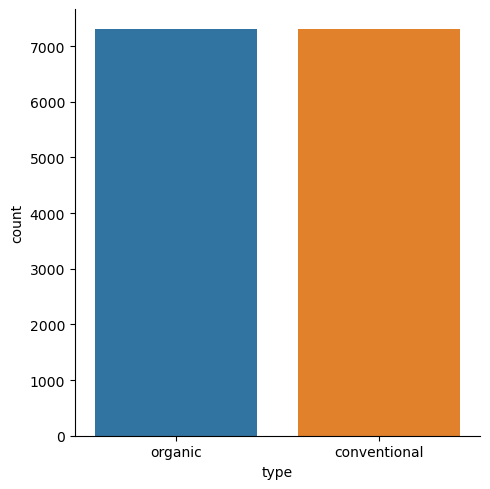

In [13]:
sns.catplot(x="type", kind="count",data=train_df)

In [14]:
train_df['year'].value_counts()

2017    4585
2016    4509
2015    4487
2018    1018
Name: year, dtype: int64

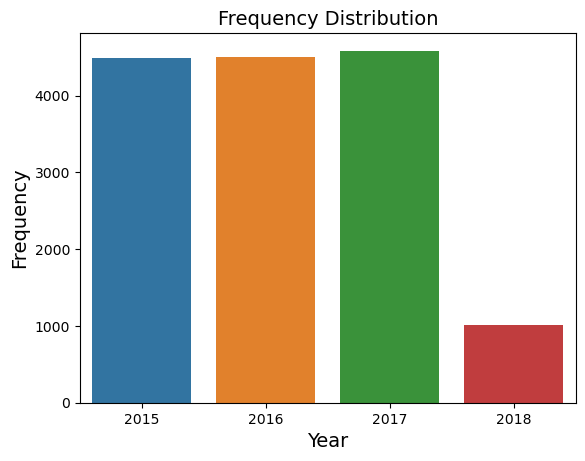

In [16]:
sns.countplot(x = 'year', data = train_df)
plt.xlabel(xlabel = 'Year', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)
plt.show()

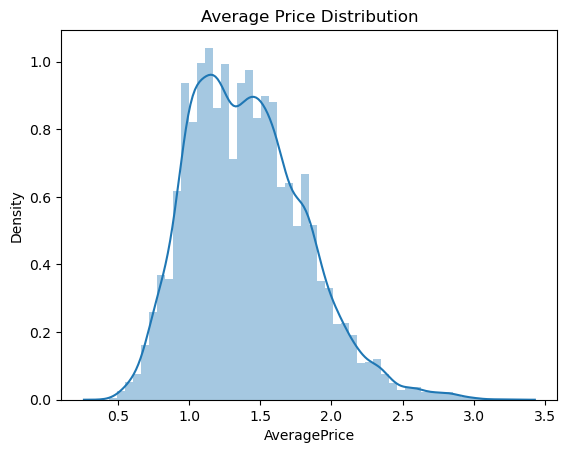

In [21]:
sns.distplot(train_df['AveragePrice'])
plt.title(label = 'Average Price Distribution')
plt.show()

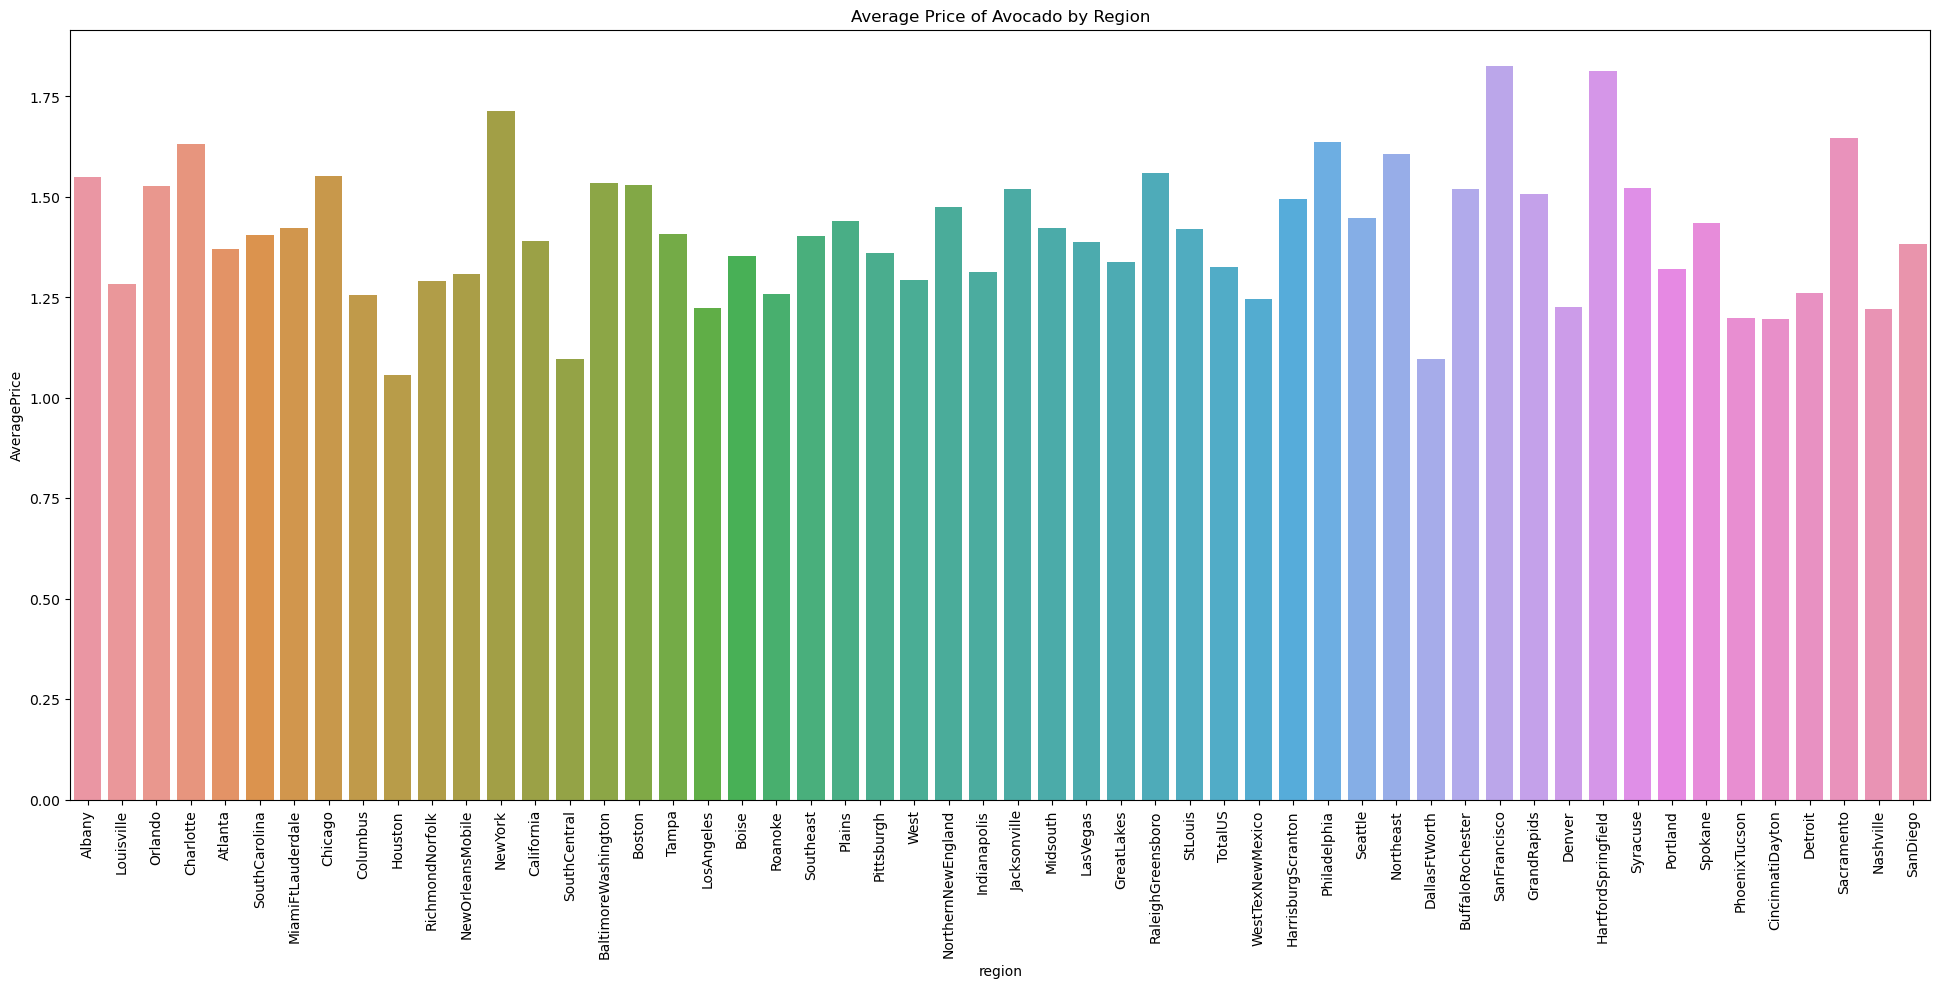

In [31]:
sns.barplot(data=train_df, x='region', y='AveragePrice', ci=None)
plt.show()

In [23]:
train_df['region'].value_counts()

Tampa                  285
Boston                 284
Seattle                282
Portland               280
Northeast              280
HartfordSpringfield    277
Chicago                277
HarrisburgScranton     277
Boise                  277
Plains                 276
NewYork                276
Albany                 275
Detroit                275
BuffaloRochester       275
WestTexNewMexico       275
Jacksonville           275
Houston                274
Louisville             274
California             274
GrandRapids            274
MiamiFtLauderdale      274
CincinnatiDayton       273
Denver                 273
NewOrleansMobile       272
LasVegas               272
Columbus               271
BaltimoreWashington    271
SanDiego               270
Roanoke                270
Philadelphia           270
SanFrancisco           269
NorthernNewEngland     269
RaleighGreensboro      269
Spokane                269
Charlotte              269
RichmondNorfolk        269
Nashville              268
S

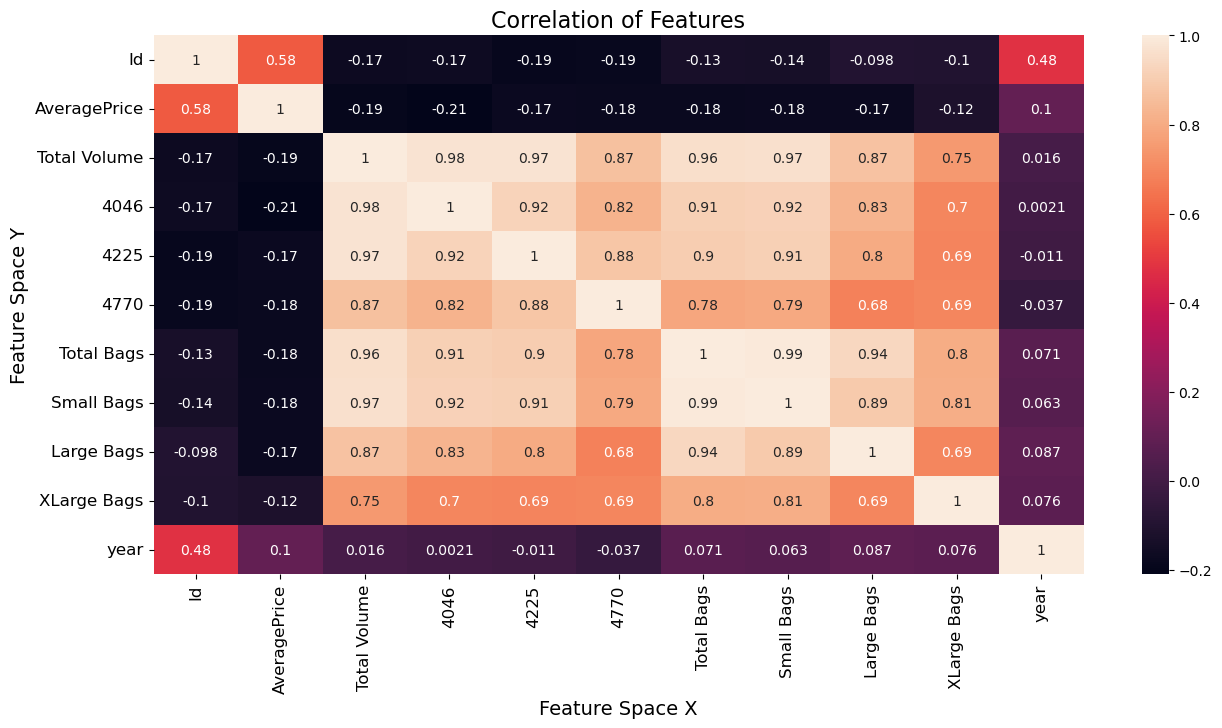

In [34]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            14599 non-null  int64         
 1   Date          14599 non-null  datetime64[ns]
 2   AveragePrice  14599 non-null  float64       
 3   Total Volume  14599 non-null  float64       
 4   4046          14599 non-null  float64       
 5   4225          14599 non-null  float64       
 6   4770          14599 non-null  float64       
 7   Total Bags    14599 non-null  float64       
 8   Small Bags    14599 non-null  float64       
 9   Large Bags    14599 non-null  float64       
 10  XLarge Bags   14599 non-null  float64       
 11  type          14599 non-null  object        
 12  year          14599 non-null  int64         
 13  region        14599 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.6+ MB


In [40]:
#Using label encoder for categorical variables
Le = LabelEncoder()

In [41]:
train_df['type'] = Le.fit_transform(train_df['type'])

**Train-Test Split:**

In [42]:
x = train_df.iloc[:, 3:13]
y = train_df['AveragePrice']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123) 

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11679, 10)
(2920, 10)
(11679,)
(2920,)


 # Linear Regression:

In [48]:
model = LinearRegression()

In [49]:
model.fit(x_train, y_train)

LinearRegression()

In [50]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [56]:
print('                 MAE, MSE, RMSE of Training data                       ')
print('MAE:', metrics.mean_absolute_error(y_train, pred_train))
print('MSE:', metrics.mean_squared_error(y_train, pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,pred_train)))

                 MAE, MSE, RMSE of Training data                       
MAE: 0.23798095138614703
MSE: 0.0964197711078003
RMSE: 0.3105153315181077


In [57]:
print('                 MAE, MSE, RMSE of Testing data                       ')
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

                 MAE, MSE, RMSE of Testing data                       
MAE: 0.24307142420173716
MSE: 0.09898094813811202
RMSE: 0.31461237759839017


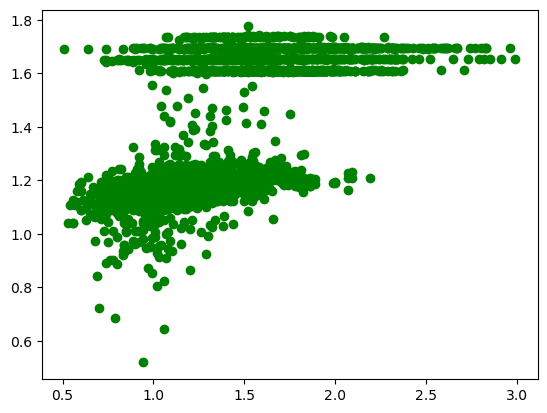

In [69]:
plt.scatter(x = y_test,y = pred_test, color = 'green')
plt.show()

# Decision Tree Regressor:

In [60]:
dtree = DecisionTreeRegressor()

In [61]:
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [62]:
predict_dt_train = dtree.predict(x_train)
predict_dt_test = dtree.predict(x_test)

In [64]:
print('                 MAE, MSE, RMSE of Training data                       ')
print('MAE:', metrics.mean_absolute_error(y_train, predict_dt_train))
print('MSE:', metrics.mean_squared_error(y_train, predict_dt_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,predict_dt_train)))

                 MAE, MSE, RMSE of Training data                       
MAE: 5.418504358561001e-19
MSE: 9.181931612593655e-35
RMSE: 9.58223961952197e-18


In [65]:
print('                 MAE, MSE, RMSE of Testing data                       ')
print('MAE:', metrics.mean_absolute_error(y_test, predict_dt_test))
print('MSE:', metrics.mean_squared_error(y_test, predict_dt_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predict_dt_test)))

                 MAE, MSE, RMSE of Testing data                       
MAE: 0.1622876712328767
MSE: 0.05995534246575342
RMSE: 0.24485780050011358


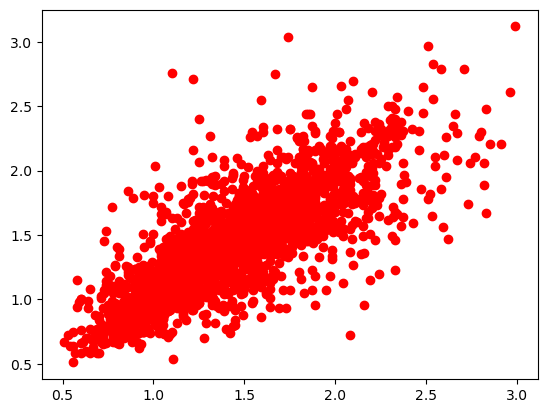

In [67]:
plt.scatter(x = y_test,y = predict_dt_test, color = 'red')
plt.show()

# Random Forest Regressor:

In [70]:
rfr = RandomForestRegressor()

In [71]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [72]:
predict_rf_train = rfr.predict(x_train)
predict_rf_test = rfr.predict(x_test)

In [73]:
print('                 MAE, MSE, RMSE of Training data                       ')
print('MAE:', metrics.mean_absolute_error(y_train, predict_rf_train))
print('MSE:', metrics.mean_squared_error(y_train, predict_rf_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,predict_rf_train)))

                 MAE, MSE, RMSE of Training data                       
MAE: 0.04619330422125183
MSE: 0.0045771917544310285
RMSE: 0.06765494626729836


In [74]:
print('                 MAE, MSE, RMSE of Testing data                       ')
print('MAE:', metrics.mean_absolute_error(y_test, predict_rf_test))
print('MSE:', metrics.mean_squared_error(y_test, predict_rf_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predict_rf_test)))

                 MAE, MSE, RMSE of Testing data                       
MAE: 0.12574085616438355
MSE: 0.032624679743150684
RMSE: 0.18062303215025122


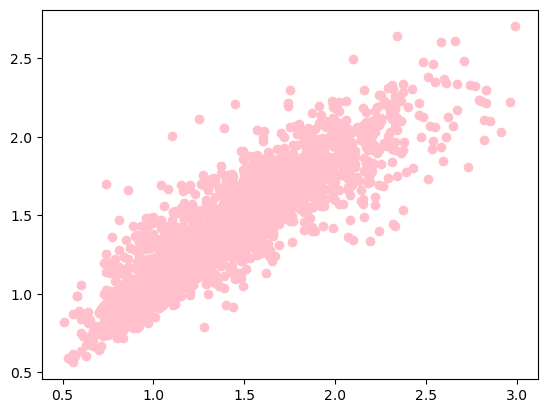

In [75]:
plt.scatter(x = y_test,y = predict_rf_test, color = 'pink')
plt.show()

In [76]:
test_df.head()

,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11137,2015-05-03,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,organic,2015,RichmondNorfolk
1,16503,2017-10-08,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,organic,2017,PhoenixTucson
2,6438,2017-07-02,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,conventional,2017,GreatLakes
3,8247,2017-05-14,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,conventional,2017,Syracuse
4,10481,2015-12-13,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,organic,2015,Nashville


In [77]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            3650 non-null   int64  
 1   Date          3650 non-null   object 
 2   Total Volume  3650 non-null   float64
 3   4046          3650 non-null   float64
 4   4225          3650 non-null   float64
 5   4770          3650 non-null   float64
 6   Total Bags    3650 non-null   float64
 7   Small Bags    3650 non-null   float64
 8   Large Bags    3650 non-null   float64
 9   XLarge Bags   3650 non-null   float64
 10  type          3650 non-null   object 
 11  year          3650 non-null   int64  
 12  region        3650 non-null   object 
dtypes: float64(8), int64(2), object(3)
memory usage: 370.8+ KB


In [79]:
#Using label on test data
test_df['type'] = Le.fit_transform(test_df['type'])

In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            3650 non-null   int64  
 1   Date          3650 non-null   object 
 2   Total Volume  3650 non-null   float64
 3   4046          3650 non-null   float64
 4   4225          3650 non-null   float64
 5   4770          3650 non-null   float64
 6   Total Bags    3650 non-null   float64
 7   Small Bags    3650 non-null   float64
 8   Large Bags    3650 non-null   float64
 9   XLarge Bags   3650 non-null   float64
 10  type          3650 non-null   int32  
 11  year          3650 non-null   int64  
 12  region        3650 non-null   object 
dtypes: float64(8), int32(1), int64(2), object(2)
memory usage: 356.6+ KB


In [81]:
test_price = test_df.iloc[:, 2:12]

In [83]:
predicted_test = rfr.predict(test_price)

In [85]:
test_price['AveragePrice'] = predicted_test

In [89]:
test_price.to_csv('Submission_pred.csv', index = False, header = False)